In [2]:
# Temel kullandığım kütüphaneler
import pandas as pd
import numpy as np

# Görselleştirme kısmı
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn bileşenleri 
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Boyut indirgeme
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Kullanılacak modeller
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# XAI 
#XAi (eXplainable Artificial Intelligence), makine öğrenmesi modellerinin bir tahmini neden yaptığını, 
# ve hangi verilere dayanarak karar verdiğini ve ne kadar güvenilir olduğunu insanlara açıklayan yöntemler bütünüdür.
import shap

# Ayarlar
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [4]:
# Veri seti yükleme işlemi
wine = load_wine()

# DataFrame oluşturma işlemi
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Hedef değişkenini ekleme işlemi
df['target'] = wine.target

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
#Eksik değer var mı diye kontrol sağlama işlemi

df.isnull().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [7]:
# Sınıf dağılımı ve istatistiksel özet işlemi
print("Sınıf Dağılımı:")
print(df['target'].value_counts())

print("\nİstatistiksel Özellikler:")
df.describe().T


Sınıf Dağılımı:
target
1    71
0    59
2    48
Name: count, dtype: int64

İstatistiksel Özellikler:


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


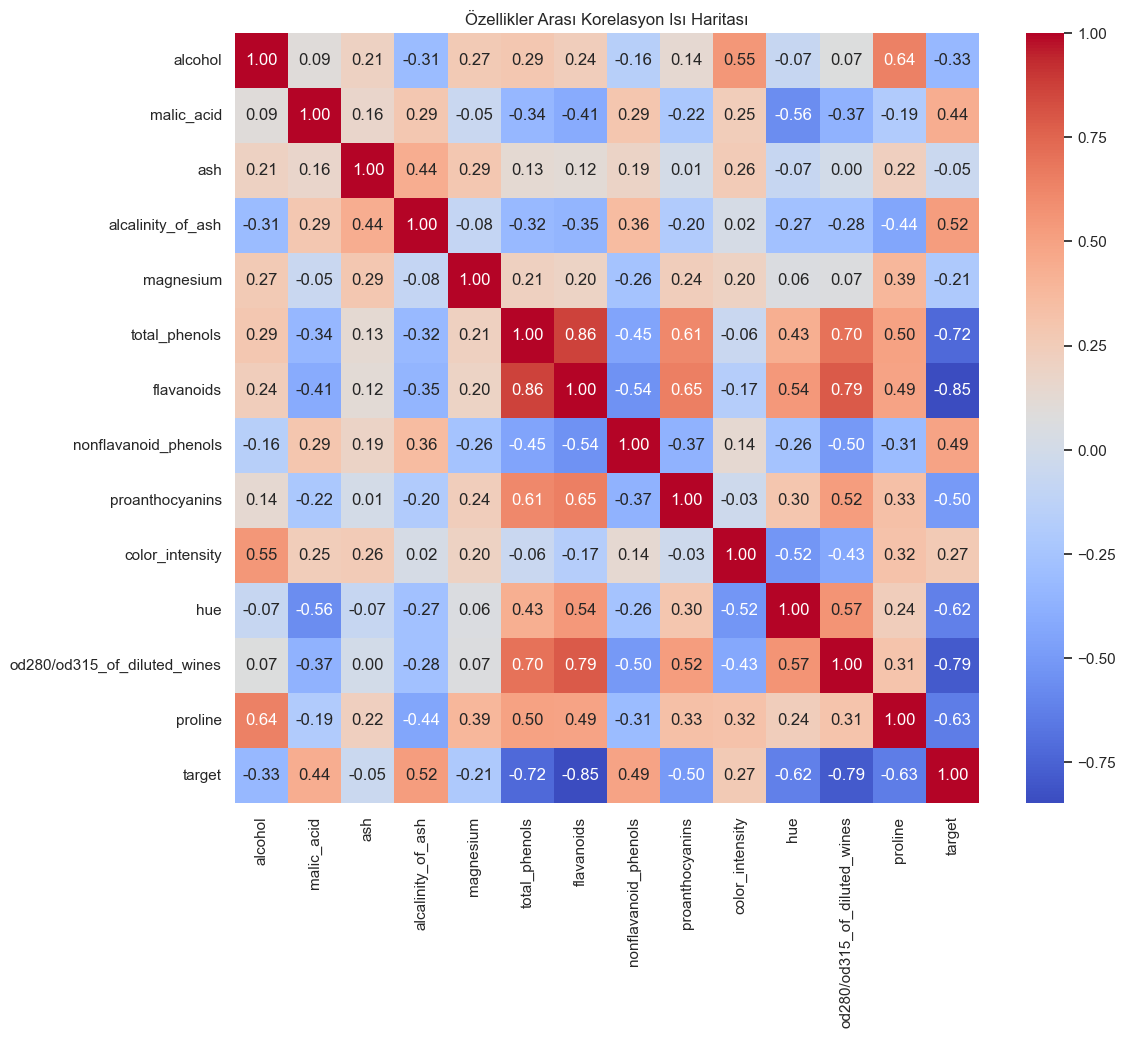

In [8]:
# Korelasyon Matrisi oluşturma işlemleri
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Özellikler Arası Korelasyon Isı Haritası")
plt.show()

In [10]:
# Scaling işlemi (Scaling, veri değer aralığını standartlaştırma işlemidir)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

X_scaled[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

In [12]:
# Veri setinin bölünmesi işlemi
X = df.drop('target', axis=1)
y = df['target']

# Önce train + temp
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)

# Temp → validation ve test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.66, random_state=42, stratify=y_temp)

In [14]:
# PCA uygulama(PCA, veri boyutunu azaltıp en önemli bilgiyi korur.)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained = pca.explained_variance_ratio_


In [17]:
# LDA uygulama(LDA, sınıfları en iyi ayıran boyutları bulup veri azaltır)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)


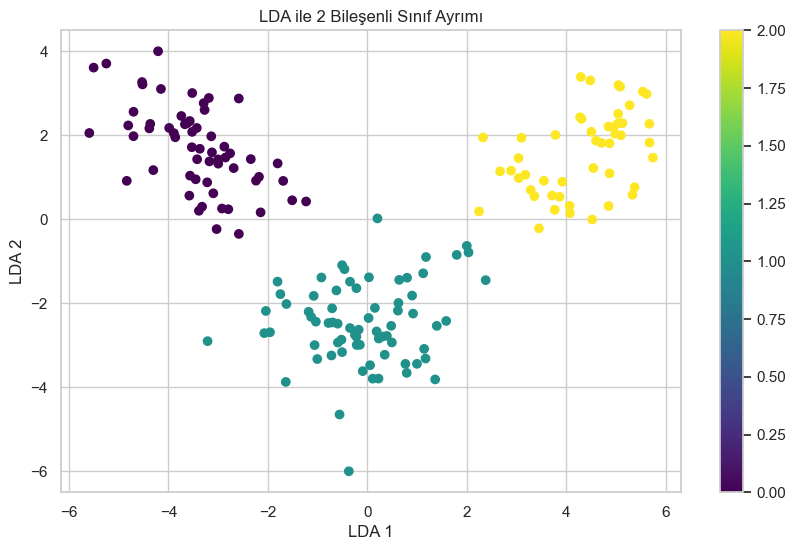

In [18]:
# Scatter Plot (2D Görselliştirme)(Scatter Plot, iki değişken arasındaki ilişkiyi noktalarla gösteren grafiktir.)
plt.figure(figsize=(10,6))
plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='viridis')
plt.title("LDA ile 2 Bileşenli Sınıf Ayrımı")
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.colorbar()
plt.show()


In [20]:
#  5 Model × 3 Veri Temsili = 15 Model Eğitimi Yapma İşlemi

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "Gaussian NB": GaussianNB()
}

datasets = {
    "Ham": X_scaled,
    "PCA": X_pca,
    "LDA": X_lda
}

results = []

for d_name, d_data in datasets.items():

    # Her veri temsili için validation split
    X_train2, X_val2, y_train2, y_val2 = train_test_split(
        d_data, y, test_size=0.20, random_state=42, stratify=y
    )

    for m_name, model in models.items():
        model.fit(X_train2, y_train2)
        y_pred2 = model.predict(X_val2)
        acc = accuracy_score(y_val2, y_pred2)

        results.append([d_name, m_name, acc])

# Sonuçlar tablosu
results_df = pd.DataFrame(results, columns=["Veri Temsili", "Model", "Accuracy"])
results_df


,Veri Temsili,Model,Accuracy
0,Ham,Logistic Regression,0.972222
1,Ham,Decision Tree,0.944444
2,Ham,Random Forest,1.000000
3,Ham,XGBoost,0.972222
4,Ham,Gaussian NB,0.972222
5,PCA,Logistic Regression,0.972222
6,PCA,Decision Tree,0.944444
7,PCA,Random Forest,0.944444
8,PCA,XGBoost,0.888889
9,PCA,Gaussian NB,0.972222


In [21]:
#Validation’daen iyi modeli seçme (validation işlemlerin bilimsel ve eğitimsel standartlara uygunluğun kanıtlanmasıdır)

best_row = results_df.loc[results_df['Accuracy'].idxmax()]
best_row


Veri Temsili              Ham
Model           Random Forest
Accuracy                  1.0
Name: 2, dtype: object

In [22]:
#En iyi modeli test setinde değerlendirme işlemi
best_model_name = best_row["Model"]
best_dataset_name = best_row["Veri Temsili"]

print("En İyi Model:", best_model_name)
print("En İyi Veri Temsili:", best_dataset_name)

# Doğru veri temsili seçiliyor
if best_dataset_name == "Ham":
    final_data = X_scaled
elif best_dataset_name == "PCA":
    final_data = X_pca
else:
    final_data = X_lda

# Test setini yeniden bölüyoruz
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    final_data, y, test_size=0.20, random_state=42, stratify=y
)

# En iyi model nesnesi
final_model = models[best_model_name]
final_model.fit(X_train_f, y_train_f)

# Test tahmini
y_pred_f = final_model.predict(X_test_f)

# Sonuçlar
print("Test Accuracy:", accuracy_score(y_test_f, y_pred_f))
print("\nClassification Report:\n", classification_report(y_test_f, y_pred_f))


En İyi Model: Random Forest
En İyi Veri Temsili: Ham
Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



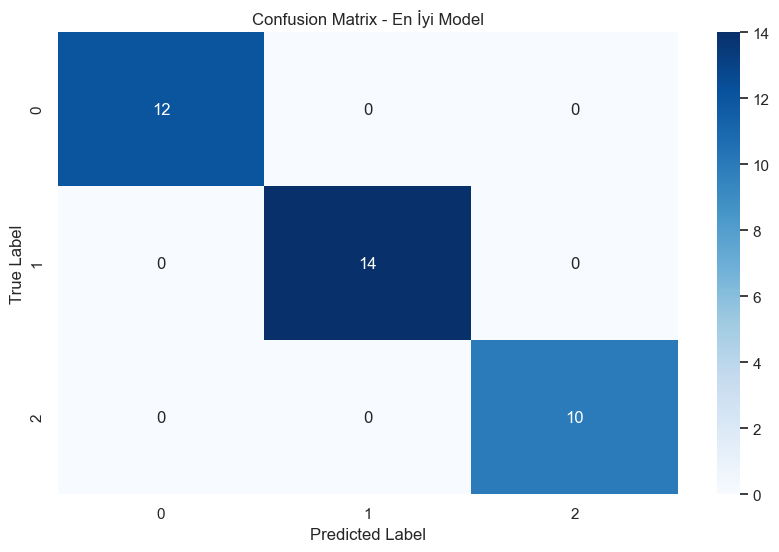

In [27]:
#Confusion Matrix
cm = confusion_matrix(y_test_f, y_pred_f)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - En İyi Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


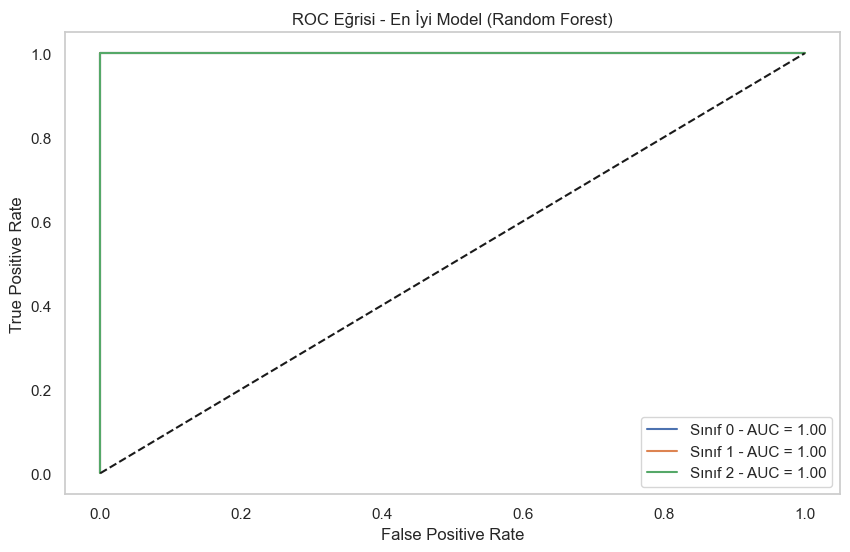

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Sınıfları binarize et (multiclass ROC için gerekli)
y_test_bin = label_binarize(y_test_f, classes=[0,1,2])
y_pred_proba = final_model.predict_proba(X_test_f)

# Her sınıf için ROC çizimi
plt.figure(figsize=(10,6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Sınıf {i} - AUC = {roc_auc:.2f}")

plt.plot([0,1], [0,1], 'k--')  # Rastgele çizgi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi - En İyi Model (Random Forest)")
plt.legend()
plt.grid()
plt.show()


In [29]:
# SHAP analizi işlemi(her bir özelliğin model tahminine katkısını açıklayan adil oyun teorisine dayalı bir yöntemdir)
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_train_f)


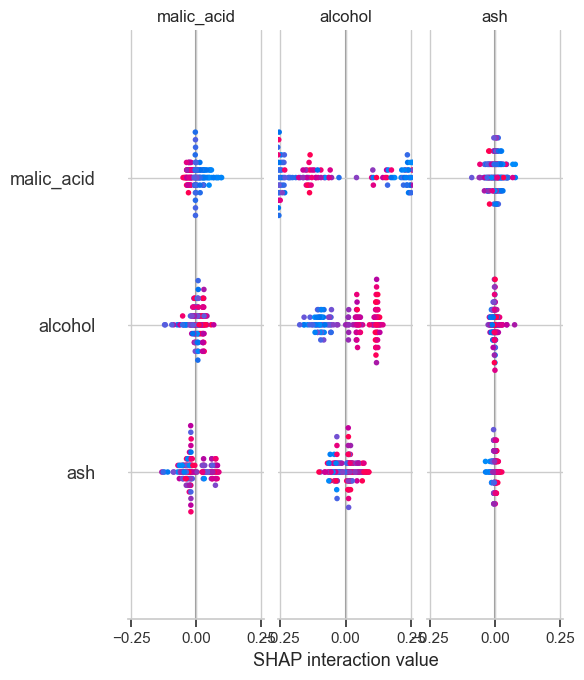

In [30]:
# SHAP summary plot(SHAP Summary Plot, her özelliğin genel model tahminine olan katkısının büyüklüğünü ve yönünü görselleştiren grafiktir)
shap.summary_plot(shap_values, X_train_f, feature_names=wine.feature_names)


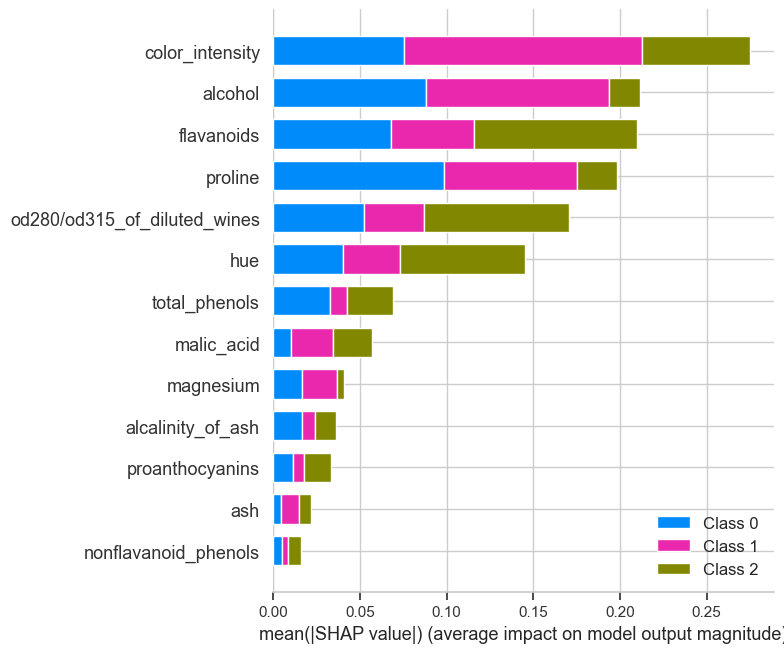

In [32]:
# SHAP Bar Plot (özelliklerin model çıktısına olan genel ortalama katkısını sıralı gösteren grafik)

import shap

# Explainer oluşturma
explainer = shap.TreeExplainer(final_model)

# SHAP değerlerini hesaplama
shap_values = explainer.shap_values(X_train_f)

# Bar plot çizimi (ortalama mutlak SHAP değerlerine göre sıralama)
shap.summary_plot(
    shap_values, 
    X_train_f, 
    feature_names=wine.feature_names, 
    plot_type="bar"
)
